In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
# Train Data

train = pd.read_csv('train.csv')

print(train.shape)

train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Test Data

test = pd.read_csv('test.csv')

print(test.shape)

test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variables

y_train = train['label']

# Drop label column

x_train = train.drop(labels=['label'], axis=1)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


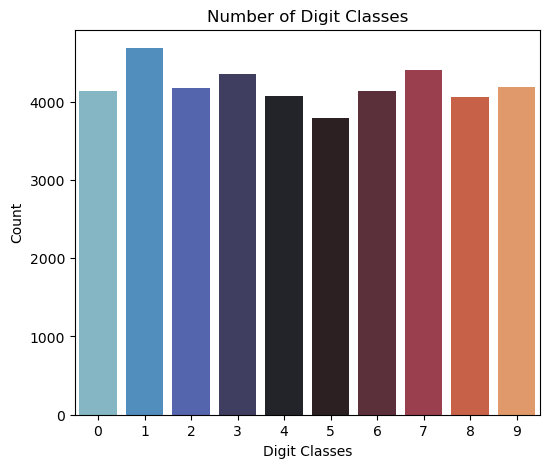

In [12]:
# visualize number of digits classes



# Assuming y_train is already defined and contains the digit classes
plt.figure(figsize=(6, 5))
g = sns.countplot(x=y_train, palette='icefire')  # 'x' is used instead of 'y' to create a bar plot
plt.title('Number of Digit Classes')
plt.xlabel('Digit Classes')
plt.ylabel('Count')

# Display the value counts of y_train
print(y_train.value_counts())

# Show the plot
plt.show()


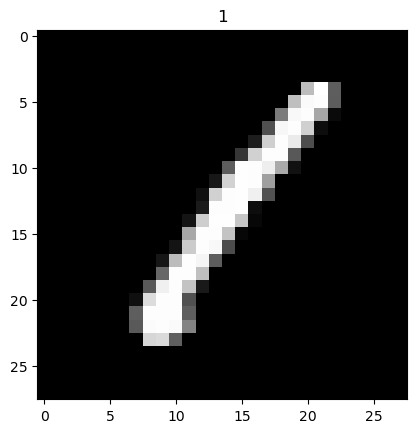

In [14]:
# plot some samples

img = x_train.iloc[0].values  # Use .values to get the numpy array
img = img.reshape((28, 28))  # Reshape the image to 28x28 pixels
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0, 0])  # Assuming the label is in the first column of the train dataframe
plt.show()

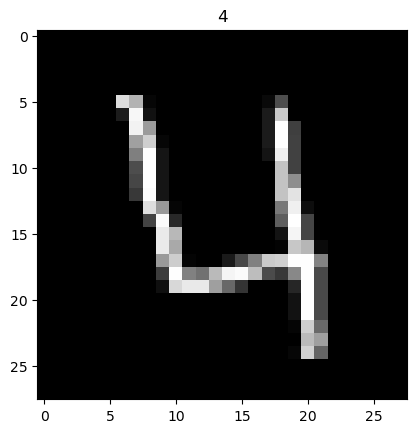

In [15]:
img = x_train.iloc[3].values  # Use .values to get the numpy array
img = img.reshape((28, 28))  # Reshape the image to 28x28 pixels
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3, 0])  # Assuming the label is in the first column of the train dataframe
plt.show()

In [16]:
# Normalize the Data

x_train = x_train / 255.0
test = test / 255.0


print('x_train shape: ', x_train.shape)
print('test shape: ', test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [17]:
# Reshape

x_train = x_train.values.reshape(-1, 28,28, 1)
test = test.values.reshape(-1, 28, 28, 1)

print('x_train shape: ', x_train.shape)
print('test shape: ', test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [20]:
#!pip install tensorflow

In [22]:
# Label Encoding

# Label Encoding
from tensorflow.keras.utils import to_categorical  # Use tensorflow.keras.utils instead of keras.utils.np_utils

# Assuming y_train is already defined and contains the labels
y_train = to_categorical(y_train, num_classes=10)

# Checking the shape of the encoded labels
print(y_train.shape)


(42000, 10)


In [23]:
# Train Test Split

from sklearn.model_selection import train_test_split

x_train, x_val, y_train , y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=2)

print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_val.shape)

print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_val.shape)

x_train shape:  (29400, 28, 28, 1)
x_test shape:  (12600, 28, 28, 1)
y_train shape:  (29400, 10)
y_train shape:  (12600, 10)


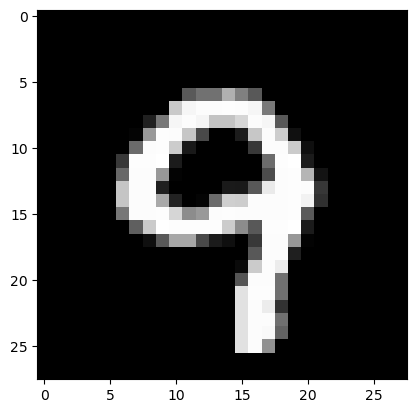

In [27]:
# Some examples

plt.imshow(x_train[2][:, :, 0], cmap='gray')
plt.show()

# CNN Implamentation

In [31]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [32]:
model = Sequential()

model.add(Conv2D(filters= 8, kernel_size= (5,5), padding='Same',
                 activation='relu', input_shape = (28, 28, 1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters= 16,  kernel_size= (3, 3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Fully connected

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [34]:
# Define the Optimizer

optimizer = Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)

In [35]:
# Compile the model

model.compile(optimizer =  optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])


In [36]:
epochs = 10

batch_size = 250



In [37]:
# Data Augmentation

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False, 
    zca_whitening=False, 
    rotation_range=5, 
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    horizontal_flip=False,
    vertical_flip=False)

datagen.fit(x_train)

In [40]:
# Fit model

history = model.fit(datagen.flow(x_train, y_train, batch_size= batch_size),
                              epochs = epochs, validation_data = (x_val, y_val),
                              steps_per_epoch = x_train.shape[0] // batch_size)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 30s 201ms/step - accuracy: 0.4059 - loss: 1.7044 - val_accuracy: 0.9063 - val_loss: 0.3849
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7760 - loss: 0.3962 - val_accuracy: 0.9080 - val_loss: 0.3807
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.7818 - loss: 0.6770 - val_accuracy: 0.9563 - val_loss: 0.1738
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8960 - loss: 0.1973 - val_accuracy: 0.9567 - val_loss: 0.1714
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - accuracy: 0.8627 - loss: 0.4211 - val_accuracy: 0.9681 - val_loss: 0.1280
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8880 - loss: 0.2008 - val_accuracy: 0.9671 - val_loss: 0.1282
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.8953 - loss: 0.3352 - val_accuracy: 0.9698 - val_loss: 0.1074
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9160 - loss: 0.1310 - 

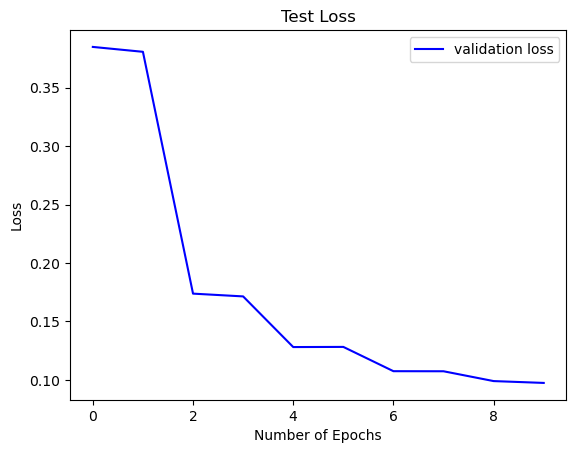

In [41]:
# Evaluate  the model

# Plot the accuracy and loss curves for training and validation

plt.plot(history.history['val_loss'], color='b', label = 'validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# Confusion matrix

y_pred = model.predict(x_val)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_val, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)



394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


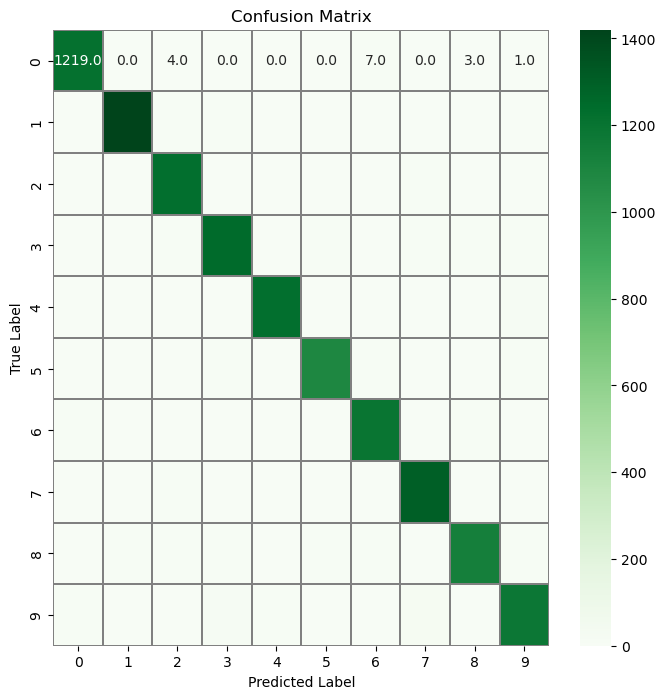

In [43]:
# plot the confusion matrix

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True,  linewidths=0.01, cmap = 'Greens', linecolor='gray', fmt='.1f', ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()